> # Yelusuri PushpaLatha Devi

# Data Science and Business Analytics Intern, Sparks Foundation.

> ## Task-6, Iris Species Prediction using Decision Tree Algorithm

> In this project our objective is to classify and predict the species type of different type of Iris Flowers given with DataSet (link for dataset:'https://bit.ly/3kXTdox')

1.Installation of libraries and importing the modules(for installion we can use: "!pip install library_name" command to be used in jupyter)                                                                                                                     
2.Data Aquisition                                                                                                               
3.Data Cleansing and processing                                                                                                 
4.Exploratory Data Analysis                                                                                                     
5.Creating an ML model                                                                                                         
6.Implementation of the model                                                                                                   
7.Acuuracy measurement                                                                                                         
8.plotting the decision tree.

In [136]:
#importing required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [109]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
#reading the data
df=pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [113]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Input data visualization

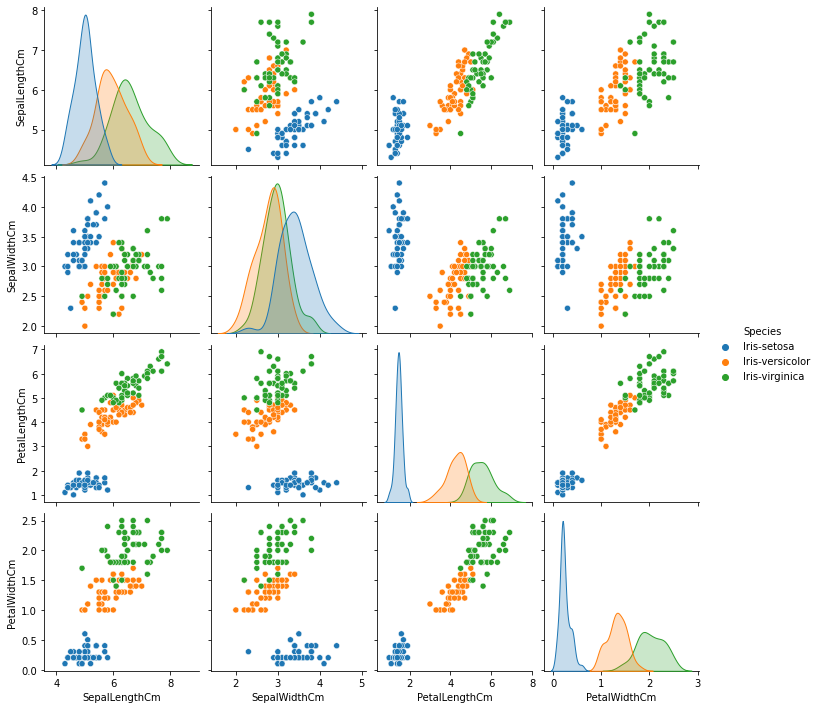

In [114]:
sns.pairplot(df, hue='Species')

<AxesSubplot:>

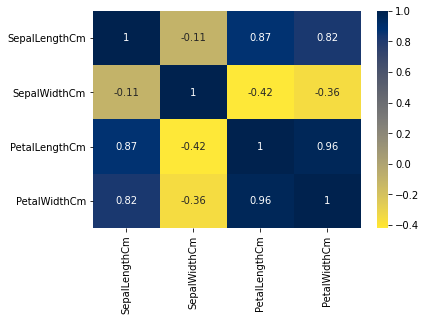

In [115]:
sns.heatmap(df.corr(),annot=True,cmap='cividis_r')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

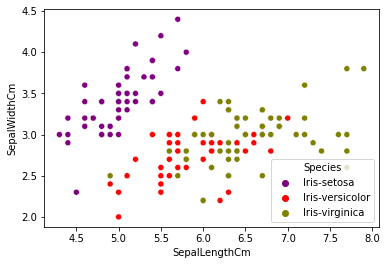

In [116]:
sns.scatterplot(x=df.SepalLengthCm, y=df.SepalWidthCm, hue=df.Species,palette='brg')

> 1.By above plot we can say that SepalLength of SETOSA flowers can't be greater than 6Cm                                         
 2.By observing below plot SETOSA can't have PetalLength of greater than 2Cm

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

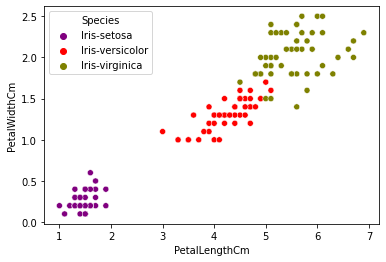

In [117]:
sns.scatterplot(x=df.PetalLengthCm, y=df.PetalWidthCm, hue=df.Species,palette='brg')

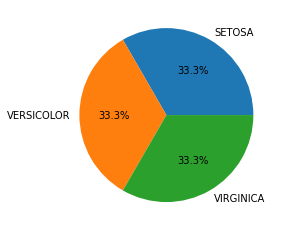

In [118]:
values_count=df['Species'].value_counts().values
labels=['SETOSA','VERSICOLOR','VIRGINICA']
plt.pie(values_count,labels=labels,autopct='%1.1f%%')
plt.show()

## Correlation Matrix

In [119]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

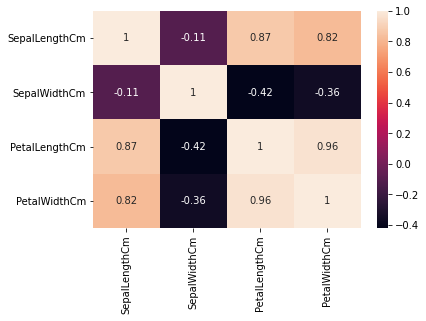

In [120]:
sns.heatmap(df.corr(),annot=True)

## Data preprocessing

In [133]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
target_values=df['Species']
data=df.copy()
data=data.drop('Species', axis=1)
print(target_values.shape)
print(data.shape)

(150,)
(150, 4)


In [123]:
#defining the attributes and labels
x = df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y = df['Species'].values

df.shape

(150, 5)

## Train_Test_Split

In [143]:
#splitting our data into train,test datasets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=107)
print("Traingin split:",x_train.shape)
print("Testin spllit:",y_test.shape)

Traingin split: (120, 4)
Testin spllit: (30,)


In [144]:
#Defining our model

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print("Decision Tree Classifier created!...")

Decision Tree Classifier created!...


## Classification Report and Confusion Matrix

In [145]:
y_pred=dtree.predict(x_test)
y_pred

array([0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 0, 0])

In [146]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [147]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [148]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [130]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]], dtype=int64)

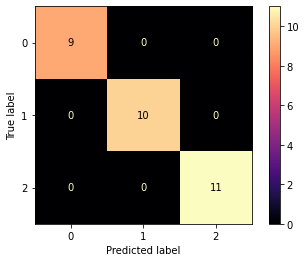

In [131]:
plot_confusion_matrix(dtree,x_test,y_test,cmap='magma')

## Decision Tree Plot

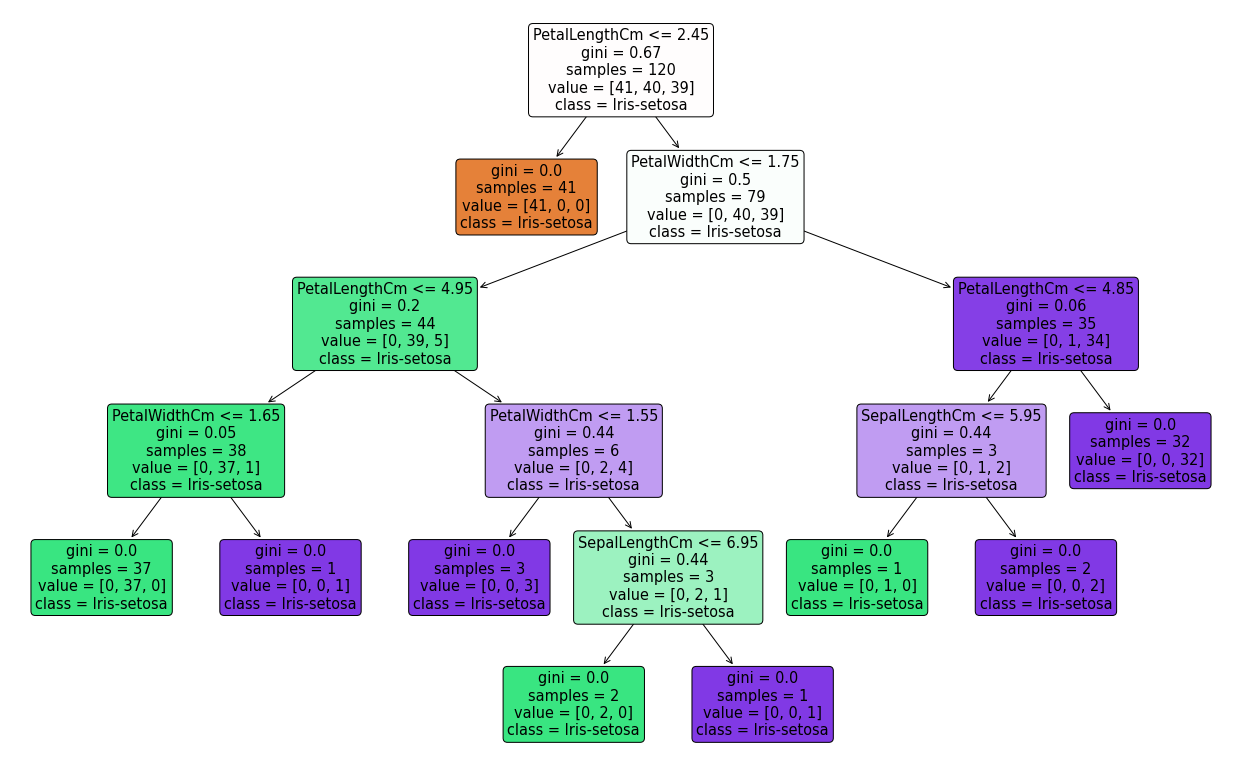

In [135]:
plt.figure(figsize=(22,14))
tree=plot_tree(dtree,feature_names=data.columns,precision=2,rounded=True,filled=True,class_names=target_values.values)

> Thus we have predicted the decision tree of the iris dataset with the accuracy percentage of 100% and plotted the decision tree for the same.